# 图像描廓

图像轮廓指的是位于已知边界上的边缘所形成的连续曲线, 可用于图像分割.

图像描廓作用在二值图像(只有黑色和白色的图像)上效果最好. 甚至可以直接通过Canny过滤器实现. 因此我们一般先把彩色图像转换为二值图像, 再进行图像描廓.

In [7]:
import utils

import cv2

import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

我们以一张手势的图片作为例子:

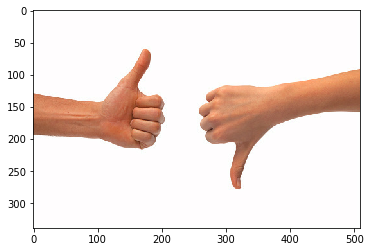

In [8]:
image = utils.imread('images/thumbs_up_down.jpg')

plt.imshow(image)

首先, 需要把这张图像转换为二值图像以方便我们进行轮廓检测.

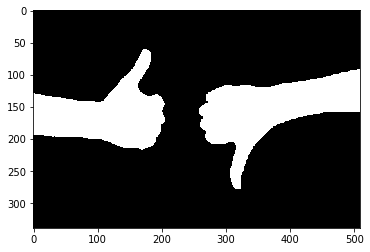

In [13]:
gray = utils.rgb2gray(image)

_, binary = cv2.threshold(gray, 225, 225, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

 下面, 从二值图像出发, 查找并绘制轮廓.

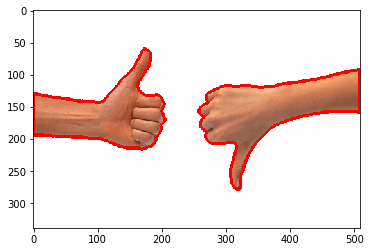

In [15]:
# 从二值图像中寻找轮廓
_, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 在原图像中绘制轮廓
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (255, 0, 0), 3)

plt.imshow(contours_image)

## 轮廓特征

提取了轮廓, 我们就可以从中提取出很多轮廓特征了. 例如面积, 方向, 周长等(更多见[OpenCV文档中](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html)).


### 轮廓方向角度

下面的代码框提取出了每个轮廓的方向角度.

一个对象的方向是指该对象所指向的角度.要找到轮廓的角度,首先应找到与该轮廓拟合的椭圆,然后从该椭圆中提取`angle`.

每个轮廓计算的方向角度都应该能够告诉我们关于手掌大概位置的信息.拇指向上的手应该比拇指向下的手角度更高(接近90度).

In [17]:
def orientations(contours):
    
    angles = []
    
    for cnt in contours:
        # 使用椭圆去拟合轮廓, 并提取角度
        (x, y), (MA, ma), angle = cv2.fitEllipse(cnt)
        angles.append(angle)
        
    return angles


angles = orientations(contours)
print('每个轮廓的角度:', str(angles))

每个轮廓的角度: [61.35833740234375, 82.27550506591797]


### 边界矩形

边界矩形是另外一个重要的特征, 它描述了轮廓所在的区域. 通过拆件边界矩形, 我们可以从图像中提取出特定的对象.

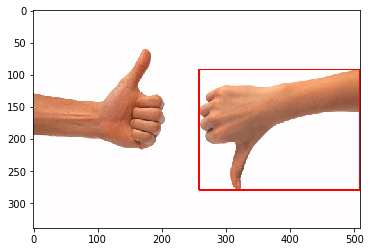

In [20]:
# 寻找轮廓的边界矩形
x,y,w,h = cv2.boundingRect(contours[0])

# 在原始图像中绘制矩形
box_image = cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.imshow(box_image)

### 使用边界矩形裁剪图像

有了边界矩形, 我们就可以提取出图像中的主要元素了.

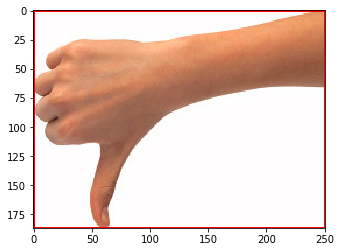

In [21]:
cropped_image = image[y:y + h, x:x + w]

plt.imshow(cropped_image)